# Importing necessary packages and classes

In [35]:
import pandas as pd
import seaborn as sns
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import pickle
import warnings

# Ignoring warnings

In [36]:
warnings.filterwarnings('ignore')

# Reading the CSV file

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/twitter_validation.csv',
                 names=['ID','Location','Target','Text'])
df

,ID,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# Checking for any missing values

In [38]:
df.isna().sum()

ID          0
Location    0
Target      0
Text        0
dtype: int64

# Checking the datatypes of each column

In [39]:
df.dtypes

ID           int64
Location    object
Target      object
Text        object
dtype: object

# Dropping unnecessary columns

In [40]:
df.drop(['ID','Location'], axis = 1, inplace=True)

In [41]:
df

,Target,Text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


# Values of Target variable

In [42]:
df['Target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

# Countplot of Target variable

<Axes: xlabel='Target', ylabel='count'>

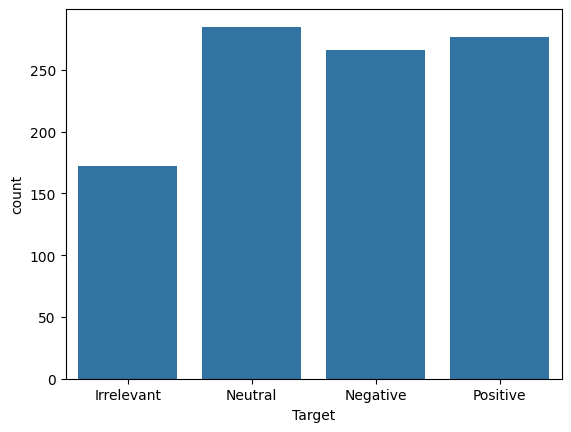

In [43]:
sns.countplot(x='Target', data=df)

# Dropping the value "Irrelevant" since it is not necessary

In [44]:
df1=df.loc[df['Target']!='Irrelevant']
df1
# OR
# df.drop(df.index[(df['Traget'] == 'Irrelevant')], axis=0, inplace=True)

,Target,Text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [45]:
df1['Target'].value_counts()

Neutral     285
Positive    277
Negative    266
Name: Target, dtype: int64

# Resetting the index

In [46]:
df1.reset_index(inplace=True)

In [47]:
df1

,index,Target,Text
0,1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,2,Negative,@Microsoft Why do I pay for WORD when it funct...
2,3,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4,Neutral,Now the President is slapping Americans in the...
4,5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...
823,993,Negative,Please explain how this is possible! How can t...
824,994,Positive,Good on Sony. As much as I want to see the new...
825,997,Positive,Today sucked so it’s time to drink wine n play...
826,998,Positive,Bought a fraction of Microsoft today. Small wins.


In [48]:
df1.drop(['index'],axis=1,inplace=True)

In [49]:
df1

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


# Converting each value of Target to a numerical value

In [50]:
df1['Target']=df1['Target'].map({'Negative':-1, 'Neutral':0,'Positive':1})
df1

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [51]:
tweets = df1.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

# Remove special characters

In [52]:
tweets = tweets.str.replace('[^a-zA-Z0-9 ]','')
tweets

0      BBC News  Amazon boss Jeff Bezos rejects claim...
1      Microsoft Why do I pay for WORD when it functi...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp Ive had Madeleine McCann in my cella...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so its time to drink wine n play ...
826      Bought a fraction of Microsoft today Small wins
827    Johnson  Johnson to stop selling talc baby pow...
Name: Text, Length: 828, dtype: object

# Stemming to reduce the words to root form

In [53]:
sb = SnowballStemmer('english')
tk = TweetTokenizer()

In [54]:
tweets = tweets.apply(lambda line:[sb.stem(token.lower())for token in tk.tokenize(line)]).apply(lambda token: " ".join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it a t...
3      now the presid is slap american in the face th...
4      hi eahelp ive had madelein mccann in my cellar...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it time to drink wine n play bor...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: Text, Length: 828, dtype: object

# Removing stopwords

In [55]:
nltk.download('stopwords')
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
tweets = tweets.apply(lambda line:[token for token in tk.tokenize(line) if token not in sw]).apply(lambda token:" ".join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp ive madelein mccann cellar past 13 y...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder us ...
Name: Text, Length: 828, dtype: object

# Vectorization to convert text to numerical format

In [57]:
vectorizer = TfidfVectorizer()
vect = vectorizer.fit_transform(tweets)
print(vect)

  (0, 693)	0.30444931436471556
  (0, 1146)	0.30444931436471556
  (0, 1277)	0.28688245905967213
  (0, 2195)	0.15709177095900126
  (0, 447)	0.2647508387565712
  (0, 1010)	0.20257552033302081
  (0, 949)	0.2647508387565712
  (0, 3054)	0.30444931436471556
  (0, 724)	0.30444931436471556
  (0, 2049)	0.28688245905967213
  (0, 782)	0.27441857686720666
  (0, 520)	0.18299317622979333
  (0, 2479)	0.23928486625711995
  (0, 692)	0.30444931436471556
  (1, 941)	0.4052090854499021
  (1, 3175)	0.4052090854499021
  (1, 2852)	0.3818283483730563
  (1, 1554)	0.4052090854499021
  (1, 4002)	0.36523945141691455
  (1, 2649)	0.31240246924634235
  (1, 3956)	0.26191944627409375
  (1, 2351)	0.24905209813650908
  (2, 1573)	0.17373491154744566
  (2, 642)	0.3681272347249391
  (2, 3736)	0.3681272347249391
  :	:
  (825, 3686)	0.25417047047308006
  (825, 780)	0.22986146346935857
  (825, 1142)	0.2316657281585646
  (825, 3675)	0.21728068459333452
  (825, 3519)	0.288330390748388
  (825, 2821)	0.17198718719403353
  (826, 152

In [58]:
vect.shape

(828, 4096)

In [59]:
type(vect)

scipy.sparse._csr.csr_matrix

# Converting vectorized data to array

In [60]:
x=vect.toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Putting these values in a DataFrame

In [61]:
df = pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Putting the Target values in a variable

In [62]:
y=df1['Target']
y

0      0
1     -1
2     -1
3      0
4     -1
      ..
823   -1
824    1
825    1
826    1
827    0
Name: Target, Length: 828, dtype: int64

# Splitting to train and test values

In [63]:
x_train,x_test,y_train,y_test = train_test_split(vect,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((579, 4096), (249, 4096), (579,), (249,))

# Performing classification algorithms(without hyperparameter tuning)

KNN
Accuracy= 48.19277108433735
              precision    recall  f1-score   support

          -1       0.39      0.84      0.53        74
           0       0.64      0.35      0.45        91
           1       0.68      0.31      0.43        84

    accuracy                           0.48       249
   macro avg       0.57      0.50      0.47       249
weighted avg       0.58      0.48      0.47       249

SVC
Accuracy= 59.43775100401606
              precision    recall  f1-score   support

          -1       0.58      0.62      0.60        74
           0       0.55      0.67      0.61        91
           1       0.68      0.49      0.57        84

    accuracy                           0.59       249
   macro avg       0.61      0.59      0.59       249
weighted avg       0.61      0.59      0.59       249

MultinomialNB
Accuracy= 59.43775100401606
              precision    recall  f1-score   support

          -1       0.53      0.77      0.63        74
           0       0.68

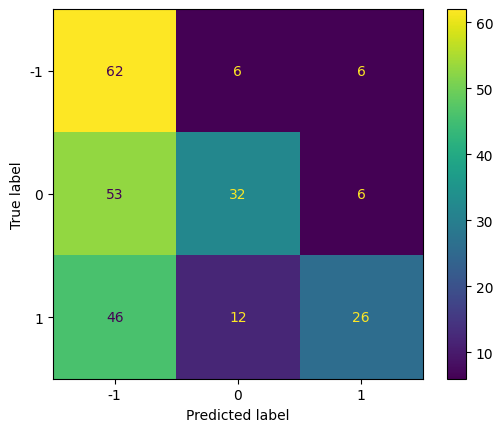

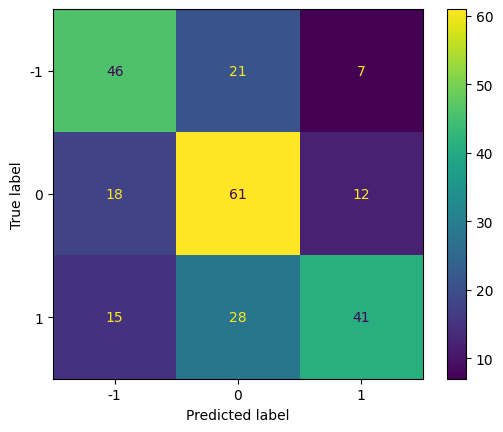

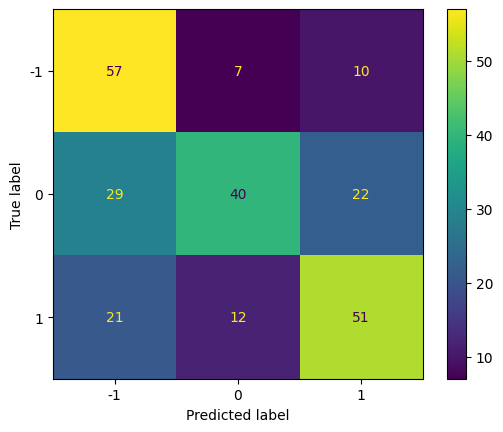

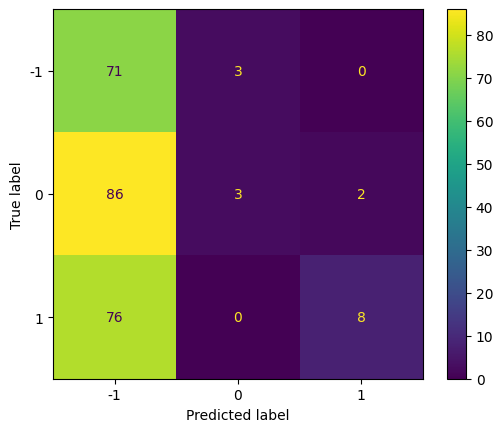

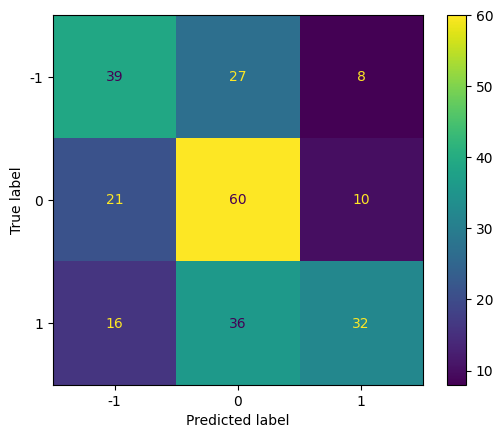

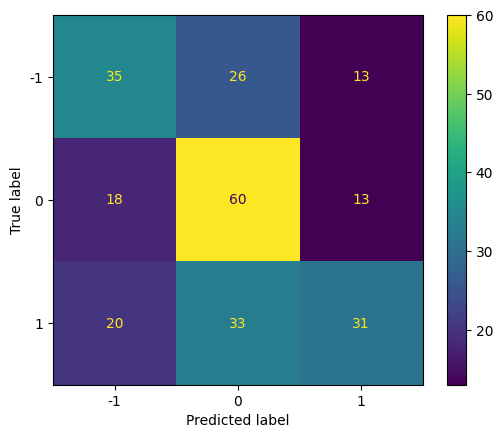

In [64]:
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC(kernel='rbf')
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
rfc=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
ad=AdaBoostClassifier(n_estimators=200,random_state=1)
# xgb=XGBClassifier(n_estimators=200,random_state=1)
models=[knn,sv,mnb,dtc,rfc,ad]
names=['KNN','SVC','MultinomialNB','Decision Tree','Random Forest Classifier','AdaBoost']
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  i=models.index(model)
  print(names[i])
  print("Accuracy=", accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# Hyperparameter Tuning

In [65]:
params_knn={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
params_sv={'kernel':['poly','linear','rbf'],'gamma':['scale','auto'],'decision_function_shape':['ovo','ovr']}
params_dtc={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[4,5,6,7,8,9,10]}
params_rfc={'n_estimators':[50,100,150,200],'max_features':['sqrt','log2'],'class_weight':['balanced','balanced_subsample']}
params_ad={'n_estimators': [50, 100, 200],'random_state':[1,2,3,4,5,6,7,8,9,10]}
# params_xgb={'n_estimators':[50,100,200],'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_knn=GridSearchCV(knn,params_knn,cv=5,scoring='accuracy')
clf_sv=GridSearchCV(sv,params_sv,cv=5,scoring='accuracy')
clf_dtc=GridSearchCV(dtc,params_dtc,cv=5,scoring='accuracy')
clf_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='accuracy')
clf_ad=GridSearchCV(ad,params_ad,cv=5,scoring='accuracy')
# clf_xgb=GridSearchCV(xgb,params_xgb,cv=5,scoring='accuracy')
clf_knn.fit(x_train,y_train)
clf_sv.fit(x_train,y_train)
clf_dtc.fit(x_train,y_train)
clf_rfc.fit(x_train, y_train)
clf_ad.fit(x_train,y_train)
# clf_xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=200, random_state=1),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [66]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn.best_params_)
print("SVC:",clf_sv.best_params_)
print("DecisionTree Classifier:",clf_dtc.best_params_)
print("Random Forest Classifier:",clf_rfc.best_params_)
print("AdaBoost Classifier:",clf_ad.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
SVC: {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
DecisionTree Classifier: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Random Forest Classifier: {'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'n_estimators': 200}
AdaBoost Classifier: {'n_estimators': 200, 'random_state': 4}


# Performing classification algorithms(with hyperparameter tuning)

KNN
Accuracy= 50.602409638554214
              precision    recall  f1-score   support

          -1       0.43      0.82      0.56        74
           0       0.62      0.37      0.47        91
           1       0.61      0.37      0.46        84

    accuracy                           0.51       249
   macro avg       0.55      0.52      0.50       249
weighted avg       0.56      0.51      0.49       249

SVC
Accuracy= 59.43775100401606
              precision    recall  f1-score   support

          -1       0.58      0.62      0.60        74
           0       0.55      0.67      0.61        91
           1       0.68      0.49      0.57        84

    accuracy                           0.59       249
   macro avg       0.61      0.59      0.59       249
weighted avg       0.61      0.59      0.59       249

Decision Tree
Accuracy= 44.17670682730924
              precision    recall  f1-score   support

          -1       0.65      0.18      0.28        74
           0       0.3

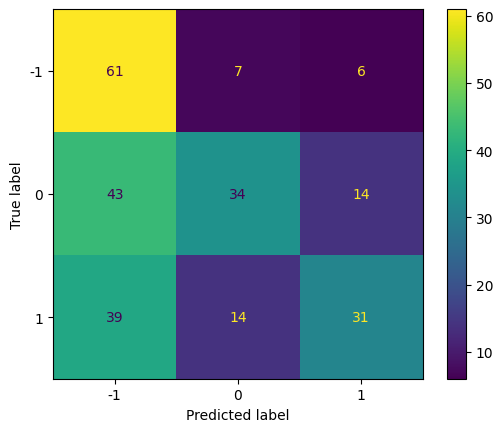

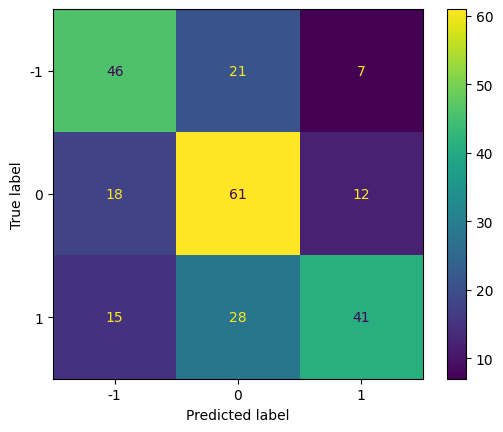

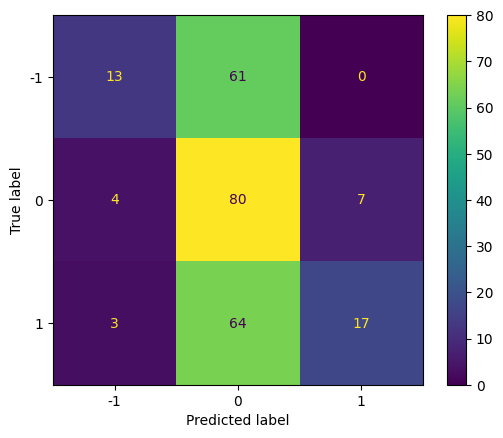

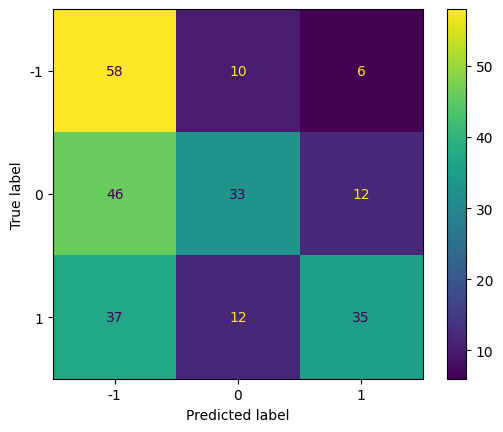

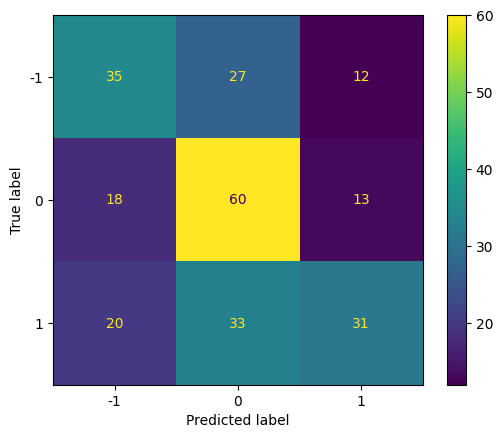

In [67]:
knn1=KNeighborsClassifier(algorithm='auto', n_neighbors=7, weights='distance')
sv1=SVC(kernel='rbf',gamma='scale',decision_function_shape='ovo')
# gnb1=GaussianNB()
dtc1=DecisionTreeClassifier(random_state=1,splitter='best',criterion='entropy',max_depth=10)
rfc1=RandomForestClassifier(n_estimators=200,random_state=1,max_features='sqrt',class_weight='balanced_subsample')
ad1=AdaBoostClassifier(n_estimators=200,random_state=4)
# xgb1=XGBClassifier(n_estimators=200,random_state=1)
models1=[knn1,sv1,dtc1,rfc1,ad1]
names1=['KNN','SVC','Decision Tree','Random Forest Classifier','AdaBoost']
for model1 in models1:
  model1.fit(x_train,y_train)
  y_pred1=model1.predict(x_test)
  i=models1.index(model1)
  print(names1[i])
  print("Accuracy=", accuracy_score(y_test,y_pred1)*100)
  print(classification_report(y_test,y_pred1))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [68]:
# The best model is Support Vector Classifier with kernel='rbf',gamma='scale',decision_function_shape='ovo'
# Accuracy = 59.43775100401606

# Predicting the output

In [69]:
y_new = sv1.predict(vectorizer.transform(['csgo matchmak full closet hack truli aw game']))
if y_new == -1:
  print("Negative")
elif y_new == 0:
  print("Neutral")
else:
  print("Positive")

Negative


# Saving the model of Support Vector Classifier and vectorizer

In [70]:
pickle.dump(sv1,open('model_tweet.sav','wb'))
pickle.dump(vectorizer,open('vector_tweet.sav','wb'))